## 4. Keras MLP (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.float64'> <class 'numpy.uint8'>
5


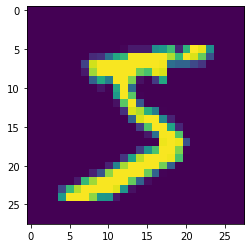

In [3]:
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)
print(type(x_train[0,0,0]), type(y_train[0]))
plt.imshow(x_train[0,:,:])
print(y_train[0])

In [4]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu' ))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1404 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9735
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0746 - accuracy: 0.9766


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9765


[0.07783514261245728, 0.9764999747276306]

## 5. Keras CNN (MNIST)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
#
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [13]:
# reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


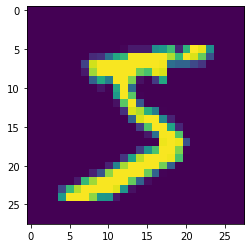

In [15]:
samplenum = 0
plt.imshow(np.reshape(x_train[samplenum,],(28,28)))


In [17]:
model = Sequential([
  Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
  Conv2D(32, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [18]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.1349 - accuracy: 0.9579 - val_loss: 0.0469 - val_accuracy: 0.9863
Epoch 2/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0315 - val_accuracy: 0.9895
Epoch 3/3
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0328 - val_accuracy: 0.9892


In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 697us/sample - loss: 0.0307 - acc: 0.9901


[0.030693770033324835, 0.9901]